# 붗꽃(iris) 데이터 분류
- 붗꽃(iris)은 관상용으로도 재배되는 아름다운 꽃이며 크기와 색상이 다른 많은 종이 있다
- 세 붗꽃 종의 이름은 `Versicolor`, `Setosa`, `Virginica`이며 각 종에 따라 꽃받침의 길이와 너비, 꽃잎의 길이와 너비가 약간씩 차이가 난다

## 1. 패키지 참조

In [32]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings('ignore')

import seaborn as sb
from pandas import read_excel, DataFrame, concat
from matplotlib import pyplot as plt

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier
# 분류 결과 평가를 위한 패키지
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

## 2. 데이터 가져오기
### 1) 학습 데이터 가져오기

In [3]:
origin = read_excel('https://data.hossam.kr/G02/iris.xlsx')
origin

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 3. 데이터 전처리
### 1) 종속변수 종류 확인

In [4]:
origin['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### 2) 종속변수 라벨링
- 라벨 정의

In [8]:
labels = {'setosa':0, 'versicolor':1, 'virginica':2}
labels

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

- 결과 출력을 위한 라벨 역 정의

In [9]:
classes = {0: 'setosa', 1:'versicolor', 2:'virginica'}
classes

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

- 라벨링

In [10]:
df = origin.copy()
df['Species'] = df['Species'].map(labels)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 3) 독립변수(feature), 종속변수(label) 분리

In [13]:
x = df.drop('Species', axis=1)
y = df.filter(['Species'])

### 4) 시각화를 통한 데이터 확인
- case 1: feature 2개만 사용

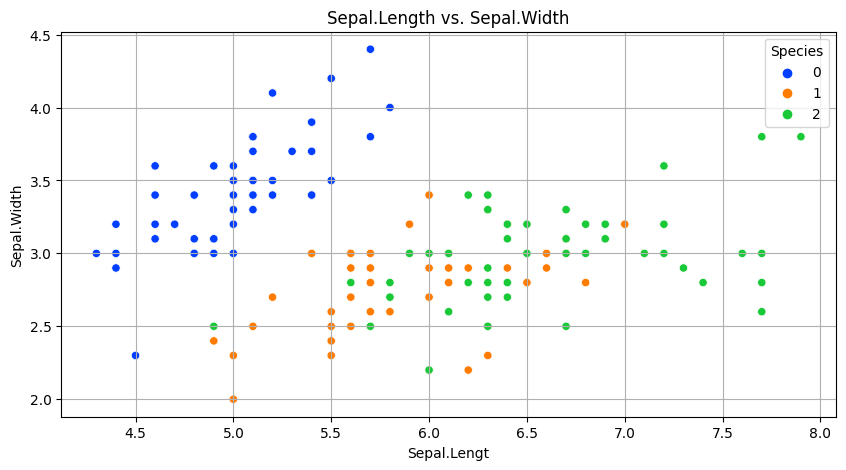

In [15]:
plt.figure(figsize=(10, 5))
sb.scatterplot(data=df,
               x='Sepal.Length',
               y='Sepal.Width',
               hue='Species',
               palette='bright')
plt.title('Sepal.Length vs. Sepal.Width')
plt.xlabel('Sepal.Lengt')
plt.ylabel('Sepal.Width')
plt.grid()
plt.show()
plt.close()

- case 2: 산점도 행렬

<Figure size 1500x1000 with 0 Axes>

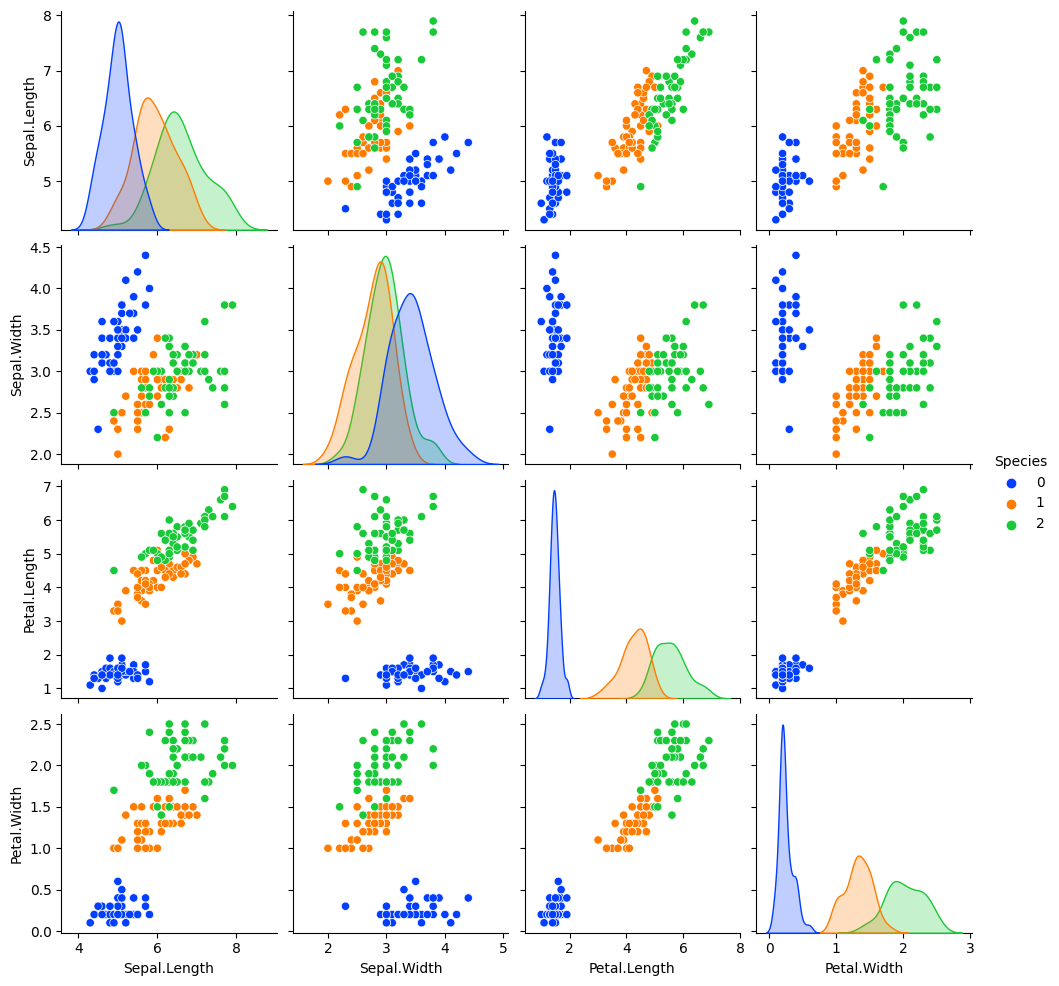

In [16]:
plt.figure(figsize=(15, 10))
sb.pairplot(data=df,
            hue='Species',
            palette='bright')
plt.show()
plt.close()

## 4. K-NN 분류모델 구성

In [19]:
# 이웃의 수
k = 3
# 모델 정의 (내가 사용하고자 하는 알고리즘 선택)
knn = KNeighborsClassifier(n_neighbors=k)
# 학습
knn.fit(x, y)
# 예측치 생성
y_pred = knn.predict(x)
# 측정값과 예측치를 데이터프레임으로 생성
y_pred_df = DataFrame({'y': y.values.flatten(), 'y_pred': y_pred})
y_pred_df

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


## 5. 분류 결과 확인
### 1) 새로운 데이터 투입
- 새로운 분류 대상 정의

In [44]:
new_data = [[5.2, 3.5, 1.5, 0.2], [6.2, 3.5, 5.4, 2.3], [5,	3, 1.4, 0.5]]
# new_data = [[5.2, 3.5, 1.5, 0.2]]

- 새로운 분류 대상에 대한 예측

In [45]:
new_data_pred = knn.predict(new_data)
for a in range(len(new_data)):
    print('데이터: {0}, 예측: {1}'.format(new_data_pred[a], classes[new_data_pred[a]]))

데이터: 0, 예측: setosa
데이터: 2, 예측: virginica
데이터: 0, 예측: setosa


- 근접한 이웃의 거리와 인덱스

In [46]:
dist, indexes = knn.kneighbors(new_data)
print('거리: {0}, 인덱스: {1}'.format(dist, indexes))

거리: [[0.         0.14142136 0.14142136]
 [0.1        0.26457513 0.37416574]
 [0.28284271 0.31622777 0.34641016]], 인덱스: [[ 27  28   0]
 [148 136 115]
 [ 45   1  34]]


- 근접한 이웃에 대한 실 데이터
    - 근접한 이웃 데이터를 `Numpy Array로 추출` 후 `데이터프레임으로 추출`
    > 이전 실습 내용과 동일

In [47]:
df.values[indexes]

array([[[5.2, 3.5, 1.5, 0.2, 0. ],
        [5.2, 3.4, 1.4, 0.2, 0. ],
        [5.1, 3.5, 1.4, 0.2, 0. ]],

       [[6.2, 3.4, 5.4, 2.3, 2. ],
        [6.3, 3.4, 5.6, 2.4, 2. ],
        [6.4, 3.2, 5.3, 2.3, 2. ]],

       [[4.8, 3. , 1.4, 0.3, 0. ],
        [4.9, 3. , 1.4, 0.2, 0. ],
        [4.9, 3.1, 1.5, 0.2, 0. ]]])

In [49]:
neighbor_dict = {}
for a in range(len(df.values[indexes])):
    neighbors_data_df_pre = df.iloc[indexes[a]]
    neighbor_dict[a] = neighbors_data_df_pre

neighbors_data_df = concat([neighbor_dict[0], neighbor_dict[1]])
neighbors_data_df
for b in range(1, len(neighbor_dict)):
    if b > 1:
        neighbors_data_df = concat([neighbors_data_df, neighbor_dict[b]])
    else:
        continue
neighbors_data_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
0,5.1,3.5,1.4,0.2,0
148,6.2,3.4,5.4,2.3,2
136,6.3,3.4,5.6,2.4,2
115,6.4,3.2,5.3,2.3,2
45,4.8,3.0,1.4,0.3,0
1,4.9,3.0,1.4,0.2,0
34,4.9,3.1,1.5,0.2,0


### 2) 분류 결과 시각화

In [59]:
# 팔래트 색상 확인 (deep, muted, pastel, bright, dark, colorblind)
sb.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

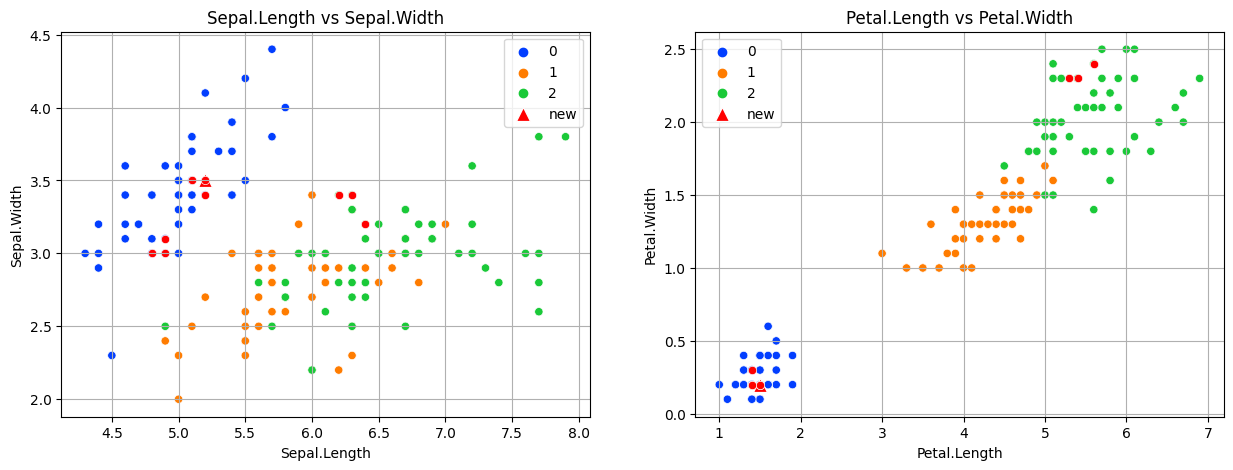

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Sepal.Length vs Sepal.Width
sb.scatterplot(data=df,
               x='Sepal.Length',
               y='Sepal.Width',
               hue='Species',
               palette='bright',
               ax=ax1)
ax1.set_title('Sepal.Length vs Sepal.Width')
ax1.set_xlabel('Sepal.Length')
ax1.set_ylabel('Sepal.Width')
ax1.grid()

# 새로운 데이터 투입
# ax1.scatter(new_data[0][0], new_data[0][1], marker='^', s=100, c='r', label='new')
sb.scatterplot(x=[new_data[0][0]],
               y=[new_data[0][1]],
               marker='^',
               s=100,
               c='r',
               label='new',
               ax=ax1)
# 근접 이웃 표시
sb.scatterplot(data=neighbors_data_df,
               x='Sepal.Length',
               y='Sepal.Width',
               c='red',
               ax=ax1)
# Petal.Length vs Petal.Width
sb.scatterplot(data=df,
               x='Petal.Length',
               y='Petal.Width',
               hue='Species',
               palette='bright',
               ax=ax2)
ax2.set_title('Petal.Length vs Petal.Width')
ax2.set_xlabel('Petal.Length')
ax2.set_ylabel('Petal.Width')
ax2.grid()

# 새로운 데이터 투입
# ax2.scatter(new_data[0][2], new_data[0][1], marker='^', s=100, c='r', label='new')
sb.scatterplot(x=[new_data[0][2]],
               y=[new_data[0][3]],
               marker='^',
               s=100,
               c='r',
               label='new',
               ax=ax2)
# 근접 이웃 표시
sb.scatterplot(data=neighbors_data_df,
               x='Petal.Length',
               y='Petal.Width',
               c='red',
               ax=ax2)

plt.show()
plt.close()

## 6. 분류 성능 평가
- 사이킷런 패키지는 metrics 모듈에 다양한 성능 평가 방법을 제공한다
- 이 때 주의할 점은 이진 분류 여부를 잘 확인하여 각각의 평가 지표를 적절하게 적용해야 한다.
    - 오차행렬(혼동행렬): `confusion_matrix(관측치, 예측치)`
    - 정확도: `accuracy_score(관측치, 예측치)`
    - 정밀도: `precision_score(관측치, 예측치)`
    - 재현율: `recall_score(관측치, 예측치)`
    - F1 Score: `f1_score(관측치, 예측치)`
    - ROC 곡선: `roc_curve(관측치, 예측치)`
    - 분류 리포트: `classification_report(관측치, 예측치)`
    - AUC: `roc_auc_score(관측치, 예측치)`
- 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 정확도만 가지고 판단할 경우 신뢰도가 떨어질 수 있다.
- 이런 경우 정밀도 혹은 재현율을 사용하는 것이 더욱 바람직하다
    - 정밀도: 실제 음성인 데이터를 양성으로 판단하는 것이 더 큰 문제인 경우에 사용한다 (예, 스팸 메일 분류 모델)
    - 재현율: 실제 양성인 데이터를 음석으로 판단하는 것이 더 큰 문제인 경우에 사용한다 (예, 암 판단 모델)

### 1) 혼동행렬(오차행렬)

In [67]:
conf_mat = confusion_matrix(y_pred_df['y'], y_pred_df['y_pred'])
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

- 혼돈행렬 시각화
    - `conf_mat`을 활용하여 직접 히트맵을 구현하기도 하지만 여기서는 sklearn의 `ConfusionMatrixDisplay` 클래스를 활용해 본다

In [68]:
cls_labels = list(classes.values())
cls_labels

['setosa', 'versicolor', 'virginica']

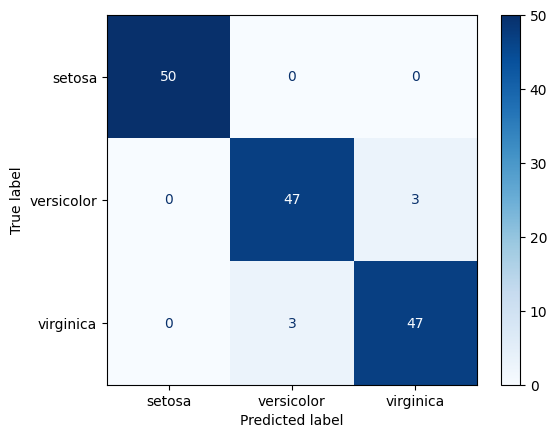

In [69]:
plot = ConfusionMatrixDisplay.from_predictions(
    y_pred_df['y'],             # 정답
    y_pred_df['y_pred'],        # 예측치
    display_labels=cls_labels,  # 라벨
    cmap=plt.cm.Blues           # 칼라맵 이름
)
plt.show()
plt.close()

### 2) 정확도 판별

In [70]:
scores = accuracy_score(y_pred_df['y'], y_pred_df['y_pred'])
print('n_neighbors: {0}, 정확도: {1:.2f}'.format(k, scores))

n_neighbors: 3, 정확도: 0.96


### 3) 정밀도, 재현율, f값
- 이 값들은 `이진분류에서만 사용`할 수 있다. 그러므로 여기서는 실행시 에러가 발생한다
- 이진분류가 아닌 경우 `다중분류`에서는 `macro`, `micro`, `weighted` 방식을 사용할 수 있다

In [75]:
scores = precision_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print('n_neighbors: {0}, 정밀도: {1:.2f}'.format(k, scores))

scores = recall_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print('n_neighbors: {0}, 재현율: {1:.2f}'.format(k, scores))

scores = f1_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print('n_neighbors: {0}, f값: {1:.2f}'.format(k, scores))

n_neighbors: 3, 정밀도: 0.96
n_neighbors: 3, 재현율: 0.96
n_neighbors: 3, f값: 0.96
